# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nadia Putri Natali Lubis
- **Email:** lubisputri16@gmail.com
- **ID Dicoding:** nadialubis

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara temperatur cuaca dan banyaknya penyewaan sepeda pada hari itu?
- Apakah terdapat hubungan signifikan antara holiday dan penyewaan sepeda harian?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- data yang tersedia merupakan data bike-sharing rent setiap harinya daru tahun 2011 hingga 2012.


### Assessing Data

In [4]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
day_df.duplicated().sum()

np.int64(0)

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak terdapat missing value pada data
- Tidak terdapat duplikasi pada data
- Data yang ada telah akurat dan valid (pengecekan berdasarkan setiap kolom)

### Cleaning Data

**Insight:**
- Define : tidak ditemukan masalah pada tahap assesing data
- Code : tidak diperlukan code untuk cleaning data
- Test : data telah siap dianalisis

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
260,261,2011-09-18,3,0,9,0,0,0,1,0.507500,0.490537,0.695000,0.178483,1353,2921,4274
496,497,2012-05-11,2,1,5,0,5,1,1,0.533333,0.520833,0.360417,0.236937,1319,5711,7030
635,636,2012-09-27,4,1,9,0,4,1,2,0.650000,0.607975,0.690833,0.134342,751,6642,7393
486,487,2012-05-01,2,1,5,0,2,1,2,0.613333,0.577021,0.659583,0.156096,653,5087,5740
708,709,2012-12-09,4,1,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975,441,2787,3228


Untuk mengetahui hubungan antara temperatur cuaca dan banyaknya penyewaan sepeda pada hari itu, kita perlu mengetahui dan mengeksplorasi fitur temp (temperatur) dan cnt (banyaknya rental) 

Pertama buat dahulu dataframe baru yang berisi fitur 'instant','temp','cnt'.

In [22]:
temp_cnt_df = day_df[['instant','temp','cnt']]

temp_cnt_df.head()

,instant,temp,cnt
0,1,0.344167,985
1,2,0.363478,801
2,3,0.196364,1349
3,4,0.200000,1562
4,5,0.226957,1600


Selanjutnya kita memeriksa distribusi data dengan menggunakan hist()

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

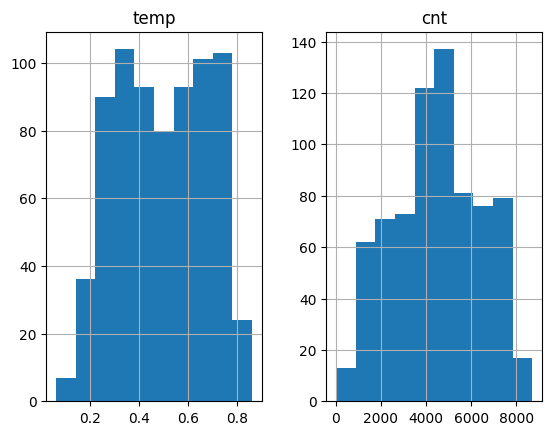

In [24]:
temp_cnt_df[['temp','cnt']].hist()

Kemudian kita dapat melihat korelasi antara temp dan cnt

In [25]:
temp_cnt_df[['temp','cnt']].corr()

,temp,cnt
temp,1.000000,0.627494
cnt,0.627494,1.000000


In [26]:
temp_cnt_df[['temp','cnt']].cov()

,temp,cnt
temp,0.033508,2.225147e+02
cnt,222.514700,3.752788e+06


<Axes: xlabel='temp', ylabel='cnt'>

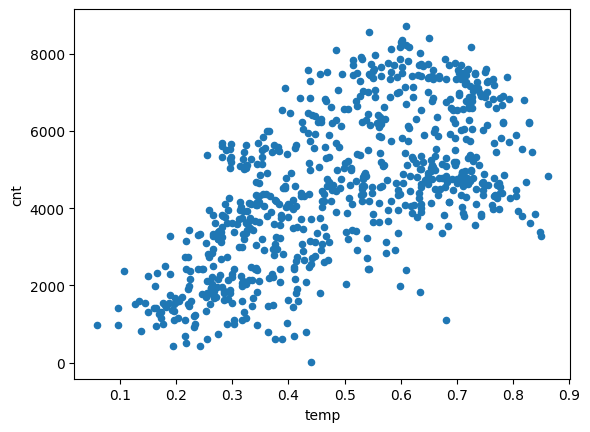

In [27]:
temp_cnt_df.plot.scatter(x='temp', y='cnt')

**Insight:**

- Menurut pendapat saya, berdasarkan grafik histogram fitur "cnt", distribusi data cukup merata karena tidak terlihat data yang hanya menumpuk di satu sisi.
- Berdasarkan method corr() dan cov() terlihat bahwa terdapat hubungan antara fitur "temp" dan "cnt"
- Hasil scatter plot antara fitur "temp" dan "cnt" menunjukkan positive correlation.

(sumber : readME pada dataset)
- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Kita dapat melakukan visualisasi data hubungan antara temperatur cuaca dan banyaknya penyewaan sepeda dengan menggunakan scatter plot.

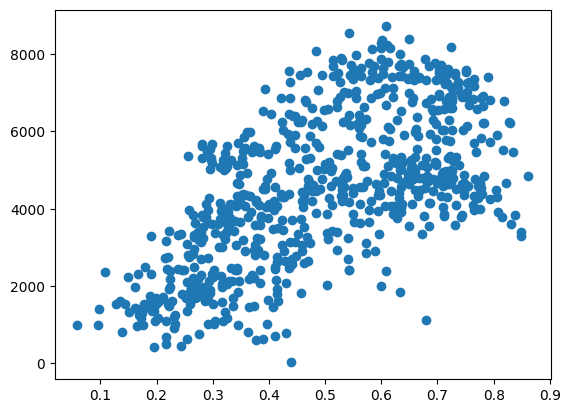

In [31]:
plt.scatter(temp_cnt_df['temp'],temp_cnt_df['cnt'])

### Pertanyaan 2:

Untuk mengetahui apakah ada hubungan signifikan holiday dan banyaknya penyewaan sepeda, kita perlu mengetahui total rental pada holiday dan non-holiday.

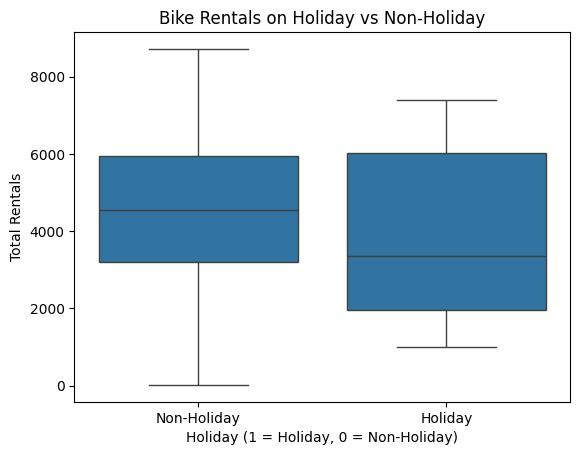

In [19]:
sns.boxplot(x='holiday', y='cnt', data=day_df)
plt.title("Bike Rentals on Holiday vs Non-Holiday")
plt.xlabel("Holiday (1 = Holiday, 0 = Non-Holiday)")
plt.ylabel("Total Rentals")
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

Kemudian kita dapat menguji hipotesa

In [20]:
holiday_rentals = day_df[day_df['holiday'] == 1]['cnt']
non_holiday_rentals = day_df[day_df['holiday'] == 0]['cnt']

t_stat, p_value = ttest_ind(holiday_rentals, non_holiday_rentals)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant correlation between holiday and bike rentals (reject the null hypothesis).")
else:
    print("There is no significant correlation between holiday and bike rentals (fail to reject the null hypothesis).")

T-statistic: -1.8497137724448645
P-value: 0.06475935792611008
There is no significant correlation between holiday and bike rentals (fail to reject the null hypothesis).


**Insight:**
- Dengan melakukan EDA dan visualisasi data, saya dapat memperoleh informasi mengenai banyaknya rental sepeda setiap musimnya. Saya juga mengetahui terdapat atau tidaknya hubungan antara Holiday dan banyaknya rental sepeda pada hari itu.

## Analisis Lanjutan (Opsional)

In [21]:
reference_date = day_df['dteday'].max()

rfm_df = day_df.groupby('instant').agg({
'dteday': lambda x: (reference_date - x.max()).days,
'instant': 'count',
'cnt': 'sum'
})

rfm_df.rename(columns={
    'dteday': 'Recency',
    'instant': 'Frequency',
    'cnt': 'Monetary'
    }, inplace=True)

rfm_df.sample(5)

,Recency,Frequency,Monetary
instant,,,
127,604,1,4714
553,178,1,6207
310,421,1,3649
85,646,1,2496
324,407,1,3520


## Conclusion

- Terdapat hubungan positif antara temperatur cuaca dan banyaknya penyewaan sepeda pada hari itu.
- Tidak terdapat korelasi signifikan antara holiday dan total penyewaan sepeda.